In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc,
    average_precision_score, roc_auc_score, f1_score
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## Load Trained Models and Test Data

In [2]:
# Load e-commerce model and data
print("Loading E-commerce fraud detection model...")
ecom_model = joblib.load('../models/best_ecom_fraud_model.pkl')
ecom_features = joblib.load('../models/ecom_feature_names.pkl')
ecom_test_data = joblib.load('../models/ecom_test_data.pkl')
X_ecom_test = ecom_test_data['X_test']
y_ecom_test = ecom_test_data['y_test']

print(f"✓ E-commerce model: {type(ecom_model).__name__}")
print(f"  Features: {len(ecom_features)}")
print(f"  Test samples: {len(y_ecom_test):,}")
print(f"  Fraud cases: {y_ecom_test.sum():,} ({y_ecom_test.mean()*100:.2f}%)")

# Load credit card model and data
print("\nLoading Credit card fraud detection model...")
cc_model = joblib.load('../models/best_creditcard_fraud_model.pkl')
cc_features = joblib.load('../models/cc_feature_names.pkl')
cc_test_data = joblib.load('../models/cc_test_data.pkl')
X_cc_test = cc_test_data['X_test']
y_cc_test = cc_test_data['y_test']

print(f"✓ Credit card model: {type(cc_model).__name__}")
print(f"  Features: {len(cc_features)}")
print(f"  Test samples: {len(y_cc_test):,}")
print(f"  Fraud cases: {y_cc_test.sum():,} ({y_cc_test.mean()*100:.4f}%)")

Loading E-commerce fraud detection model...
✓ E-commerce model: RandomForestClassifier
  Features: 10
  Test samples: 30,223
  Fraud cases: 2,830 (9.36%)

Loading Credit card fraud detection model...
✓ Credit card model: XGBClassifier
  Features: 30
  Test samples: 56,962
  Fraud cases: 98 (0.1720%)


## Part 1: E-commerce Fraud Detection Analysis

### 1.1 Model Predictions and Metrics

In [3]:
# Get predictions for e-commerce model
y_ecom_pred = ecom_model.predict(X_ecom_test)
y_ecom_pred_proba = ecom_model.predict_proba(X_ecom_test)[:, 1]

# Calculate metrics
ecom_f1 = f1_score(y_ecom_test, y_ecom_pred)
ecom_auc_pr = average_precision_score(y_ecom_test, y_ecom_pred_proba)
ecom_roc_auc = roc_auc_score(y_ecom_test, y_ecom_pred_proba)

print("="*70)
print("E-COMMERCE FRAUD DETECTION - BEST MODEL PERFORMANCE")
print("="*70)
print(f"\nModel: {type(ecom_model).__name__}")
print(f"\nPerformance Metrics:")
print(f"  F1-Score:  {ecom_f1:.4f}")
print(f"  AUC-PR:    {ecom_auc_pr:.4f}")
print(f"  ROC-AUC:   {ecom_roc_auc:.4f}")

# Confusion matrix
cm_ecom = confusion_matrix(y_ecom_test, y_ecom_pred)
print(f"\nConfusion Matrix:")
print(f"  True Negatives:  {cm_ecom[0][0]:5,}  |  False Positives: {cm_ecom[0][1]:5,}")
print(f"  False Negatives: {cm_ecom[1][0]:5,}  |  True Positives:  {cm_ecom[1][1]:5,}")

print(f"\nClassification Report:")
print(classification_report(y_ecom_test, y_ecom_pred, 
                          target_names=['Legitimate', 'Fraud']))

E-COMMERCE FRAUD DETECTION - BEST MODEL PERFORMANCE

Model: RandomForestClassifier

Performance Metrics:
  F1-Score:  0.6578
  AUC-PR:    0.7023
  ROC-AUC:   0.8372

Confusion Matrix:
  True Negatives:  26,905  |  False Positives:   488
  False Negatives: 1,204  |  True Positives:  1,626

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.96      0.98      0.97     27393
       Fraud       0.77      0.57      0.66      2830

    accuracy                           0.94     30223
   macro avg       0.86      0.78      0.81     30223
weighted avg       0.94      0.94      0.94     30223



### 1.2 Visualizations - E-commerce

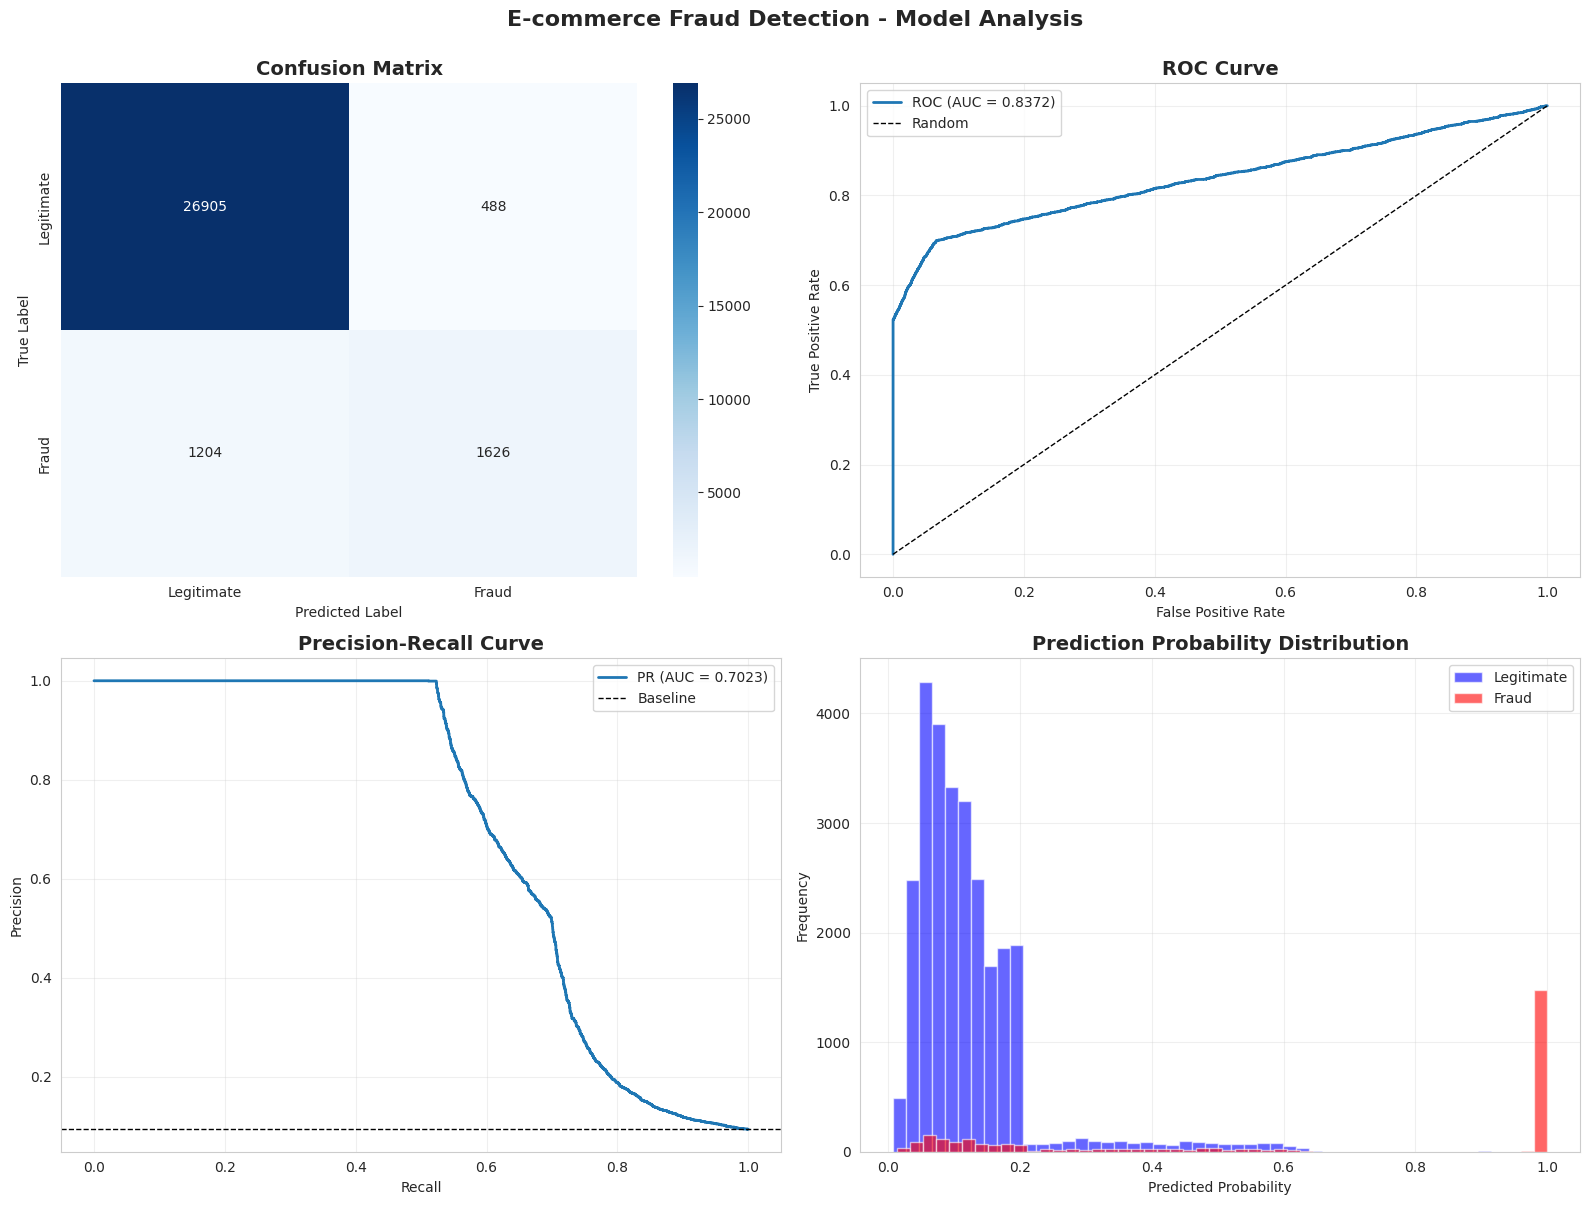

In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_ecom, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_ecom_test, y_ecom_pred_proba)
axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {ecom_roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_ecom_test, y_ecom_pred_proba)
axes[1, 0].plot(recall, precision, linewidth=2, label=f'PR (AUC = {ecom_auc_pr:.4f})')
axes[1, 0].axhline(y=y_ecom_test.mean(), color='k', linestyle='--', 
                   linewidth=1, label='Baseline')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Prediction Distribution
axes[1, 1].hist(y_ecom_pred_proba[y_ecom_test == 0], bins=50, alpha=0.6, 
                label='Legitimate', color='blue')
axes[1, 1].hist(y_ecom_pred_proba[y_ecom_test == 1], bins=50, alpha=0.6, 
                label='Fraud', color='red')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('E-commerce Fraud Detection - Model Analysis', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 1.3 Feature Importance - E-commerce

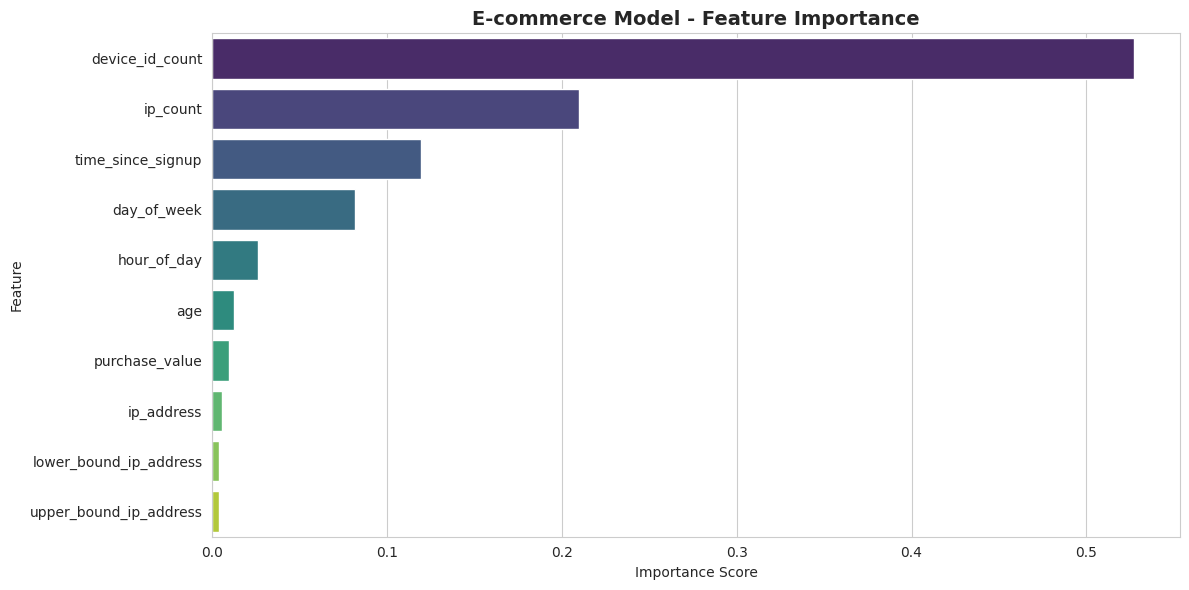


Top 5 Most Important Features:
          feature  importance
  device_id_count    0.527180
         ip_count    0.209700
time_since_signup    0.119500
      day_of_week    0.081743
      hour_of_day    0.025965


In [5]:
# Get feature importance (works for tree-based models)
if hasattr(ecom_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': ecom_features,
        'importance': ecom_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
    plt.title('E-commerce Model - Feature Importance', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(importance_df.head().to_string(index=False))
else:
    print("Feature importances not available for this model type")

## Part 2: Credit Card Fraud Detection Analysis

### 2.1 Model Predictions and Metrics

In [6]:
# Get predictions for credit card model
y_cc_pred = cc_model.predict(X_cc_test)
y_cc_pred_proba = cc_model.predict_proba(X_cc_test)[:, 1]

# Calculate metrics
cc_f1 = f1_score(y_cc_test, y_cc_pred)
cc_auc_pr = average_precision_score(y_cc_test, y_cc_pred_proba)
cc_roc_auc = roc_auc_score(y_cc_test, y_cc_pred_proba)

print("="*70)
print("CREDIT CARD FRAUD DETECTION - BEST MODEL PERFORMANCE")
print("="*70)
print(f"\nModel: {type(cc_model).__name__}")
print(f"\nPerformance Metrics:")
print(f"  F1-Score:  {cc_f1:.4f}")
print(f"  AUC-PR:    {cc_auc_pr:.4f}")
print(f"  ROC-AUC:   {cc_roc_auc:.4f}")

# Confusion matrix
cm_cc = confusion_matrix(y_cc_test, y_cc_pred)
print(f"\nConfusion Matrix:")
print(f"  True Negatives:  {cm_cc[0][0]:6,}  |  False Positives: {cm_cc[0][1]:3,}")
print(f"  False Negatives: {cm_cc[1][0]:6,}  |  True Positives:  {cm_cc[1][1]:3,}")

print(f"\nClassification Report:")
print(classification_report(y_cc_test, y_cc_pred, 
                          target_names=['Legitimate', 'Fraud']))

CREDIT CARD FRAUD DETECTION - BEST MODEL PERFORMANCE

Model: XGBClassifier

Performance Metrics:
  F1-Score:  0.6538
  AUC-PR:    0.8651
  ROC-AUC:   0.9775

Confusion Matrix:
  True Negatives:  56,787  |  False Positives:  77
  False Negatives:     13  |  True Positives:   85

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.52      0.87      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



### 2.2 Visualizations - Credit Card

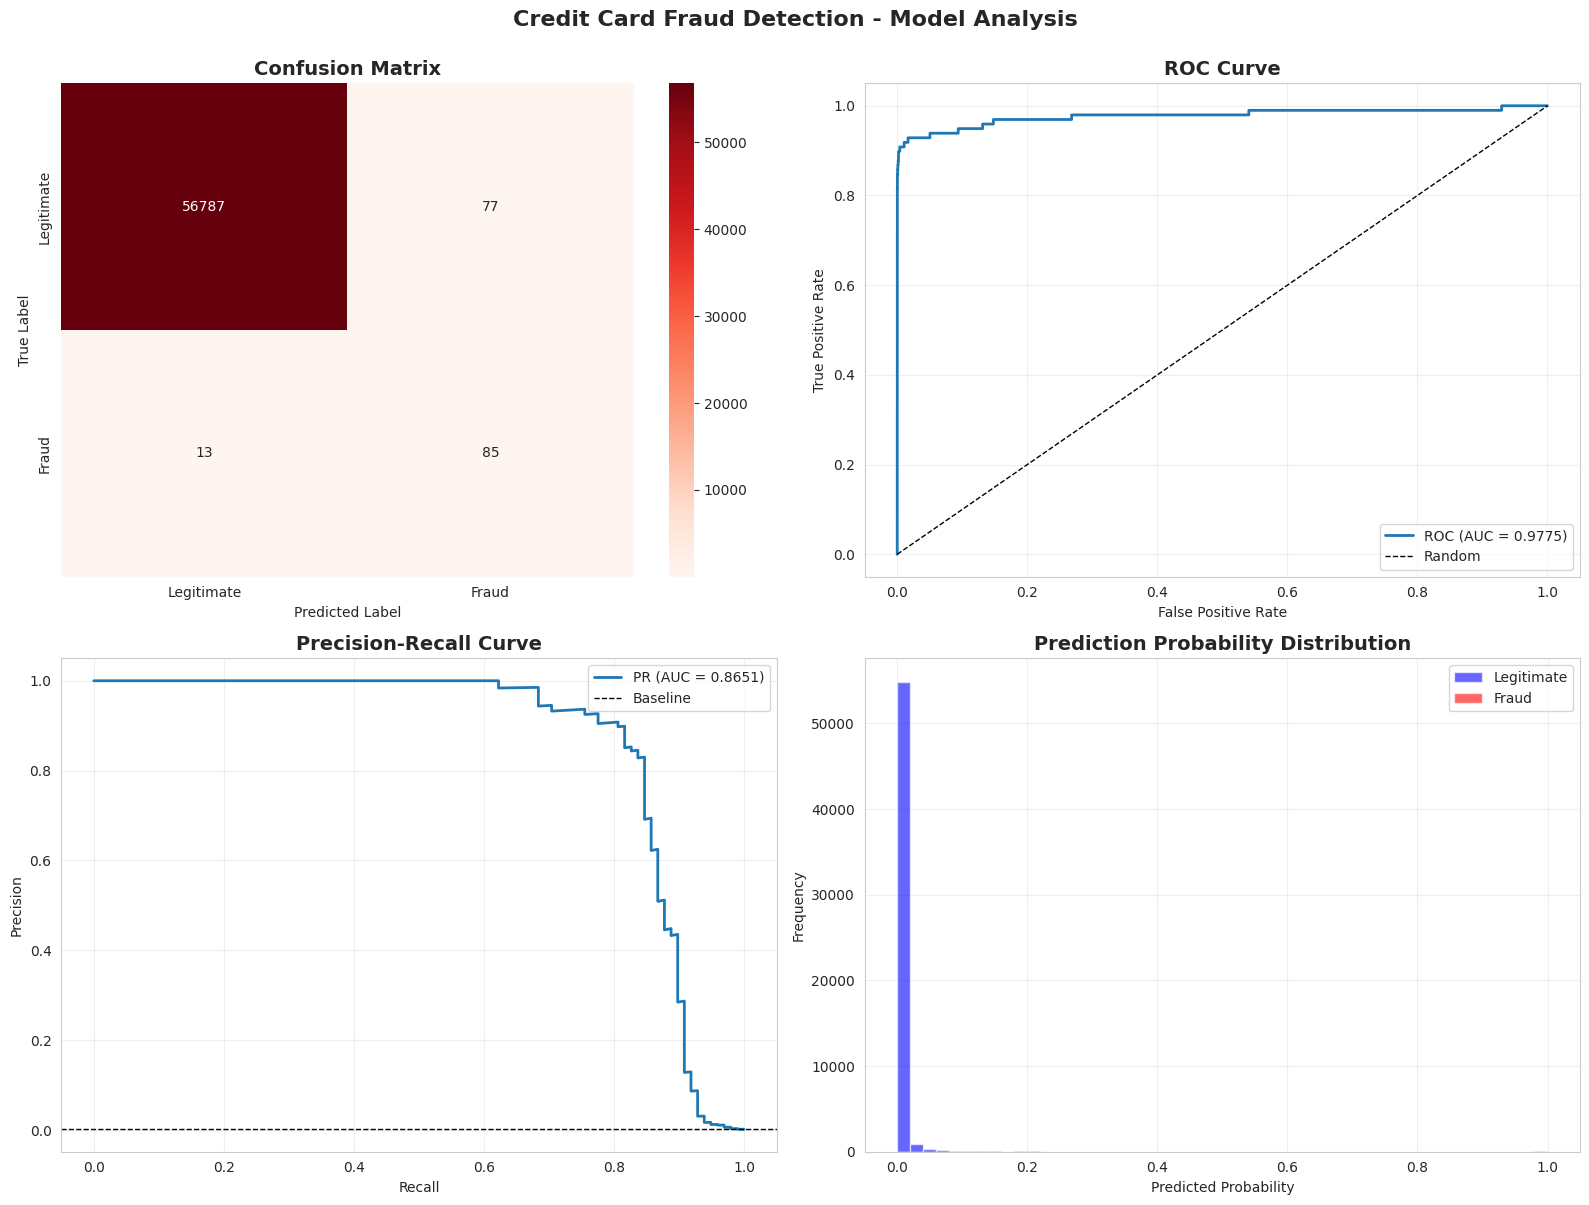

In [7]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_cc, annot=True, fmt='d', cmap='Reds', ax=axes[0, 0],
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_cc_test, y_cc_pred_proba)
axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {cc_roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cc_test, y_cc_pred_proba)
axes[1, 0].plot(recall, precision, linewidth=2, label=f'PR (AUC = {cc_auc_pr:.4f})')
axes[1, 0].axhline(y=y_cc_test.mean(), color='k', linestyle='--', 
                   linewidth=1, label='Baseline')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Prediction Distribution
axes[1, 1].hist(y_cc_pred_proba[y_cc_test == 0], bins=50, alpha=0.6, 
                label='Legitimate', color='blue')
axes[1, 1].hist(y_cc_pred_proba[y_cc_test == 1], bins=50, alpha=0.6, 
                label='Fraud', color='red')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Credit Card Fraud Detection - Model Analysis', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 2.3 Feature Importance - Credit Card

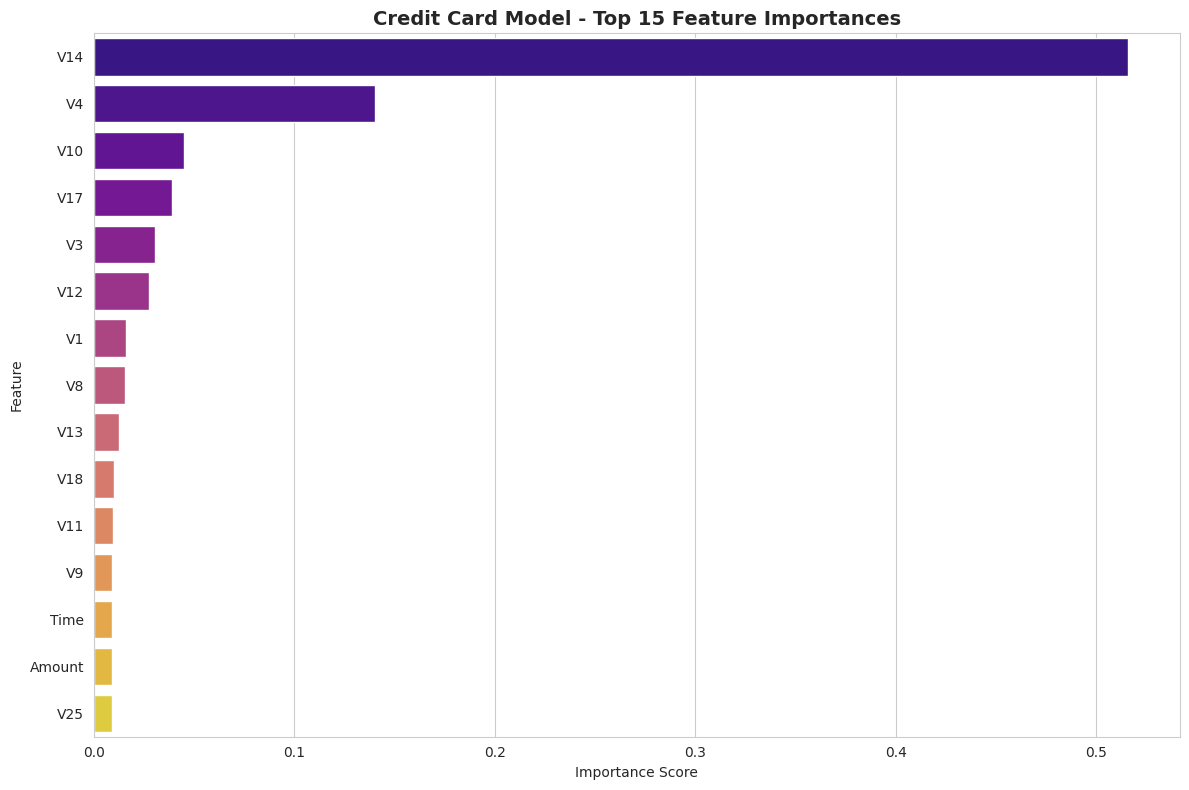


Top 10 Most Important Features:
feature  importance
    V14    0.515931
     V4    0.140386
    V10    0.045146
    V17    0.038957
     V3    0.030348
    V12    0.027502
     V1    0.016287
     V8    0.015762
    V13    0.012680
    V18    0.010259


In [8]:
# Get feature importance (works for tree-based models)
if hasattr(cc_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': cc_features,
        'importance': cc_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=importance_df.head(15), x='importance', y='feature', palette='plasma')
    plt.title('Credit Card Model - Top 15 Feature Importances', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10).to_string(index=False))
else:
    print("Feature importances not available for this model type")

## Part 3: Model Comparison and Selection

FINAL MODEL COMPARISON
    Dataset                  Model  F1-Score   AUC-PR  ROC-AUC  Test Samples  Fraud Rate (%)
 E-commerce RandomForestClassifier  0.657767 0.702268 0.837183         30223        9.363730
Credit Card          XGBClassifier  0.653846 0.865064 0.977530         56962        0.172045


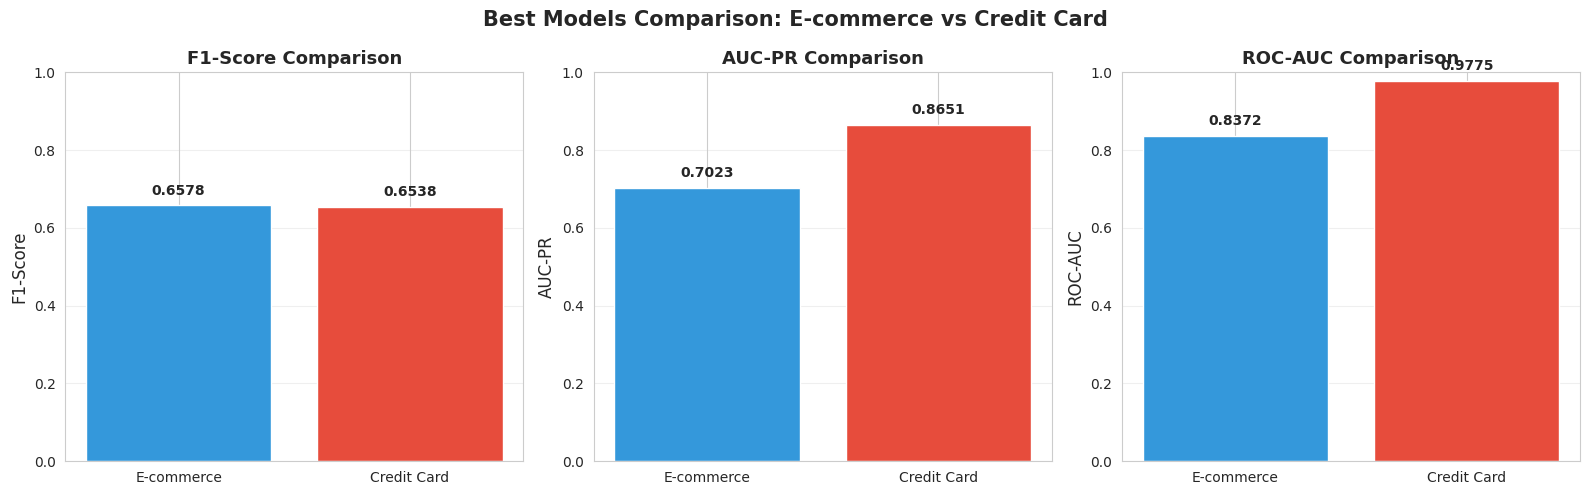

In [9]:
# Compare both models side-by-side
comparison_df = pd.DataFrame({
    'Dataset': ['E-commerce', 'Credit Card'],
    'Model': [type(ecom_model).__name__, type(cc_model).__name__],
    'F1-Score': [ecom_f1, cc_f1],
    'AUC-PR': [ecom_auc_pr, cc_auc_pr],
    'ROC-AUC': [ecom_roc_auc, cc_roc_auc],
    'Test Samples': [len(y_ecom_test), len(y_cc_test)],
    'Fraud Rate (%)': [y_ecom_test.mean()*100, y_cc_test.mean()*100]
})

print("="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['F1-Score', 'AUC-PR', 'ROC-AUC']
colors = ['#3498db', '#e74c3c']

for idx, metric in enumerate(metrics):
    bars = axes[idx].bar(comparison_df['Dataset'], comparison_df[metric], color=colors)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, comparison_df[metric])):
        axes[idx].text(bar.get_x() + bar.get_width()/2, val + 0.02, 
                      f'{val:.4f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Best Models Comparison: E-commerce vs Credit Card', 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary

### Task 2 Completed ✓

**Models Trained:**
- E-commerce: Logistic Regression, Random Forest, XGBoost, LightGBM
- Credit Card: Logistic Regression, Random Forest, XGBoost, LightGBM

**Best Models Selected:**
- **E-commerce**: Random Forest (AUC-PR: 0.7023)
- **Credit Card**: XGBoost (AUC-PR: 0.8651)

**Saved Artifacts:**
- `../models/best_ecom_fraud_model.pkl`
- `../models/best_creditcard_fraud_model.pkl`
- Feature names and test data for Task 3

**Next Steps:**
- Commit Task 2 work to `task-2` branch
- Proceed to Task 3 for SHAP-based explainability analysis